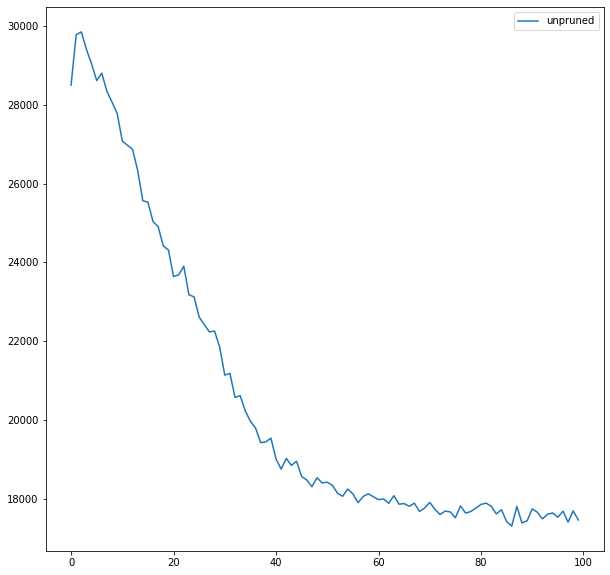

In [75]:
import re
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))

unpruned_losses = []
unpruned_KL = []
with open("mnist/train.log") as f:
    lines = f.read()
    orig_losses = re.findall("Loss: (.*) BCE:", lines)
    KL = re.findall(" KL: (.*)", lines)
    unpruned_KL = [float(j) for j in KL]
    orig_losses = [-float(j) for j in orig_losses]
    unpruned_losses = orig_losses
    
    plt.plot(orig_losses, label = 'unpruned')
'''
for i in range(95,100):
    orig_losses = []
    rand_losses = []
    with open("mnist_"+str(i)+"/train.log") as f:
        lines = f.read()
        orig_losses = re.findall("Loss:(.*) ", lines)
        orig_losses = [float(j) for j in orig_losses]

    with open("mnist_random_"+str(i)+"/train.log") as f:
        lines = f.read()
        rand_losses = re.findall("Loss:(.*) ", lines)
        rand_losses = [float(j) for j in rand_losses]
    
    plt.plot(orig_losses, label = 'original ' + str(i))
    plt.plot(rand_losses, label = 'random ' + str(i))
'''
plt.legend()
plt.show()

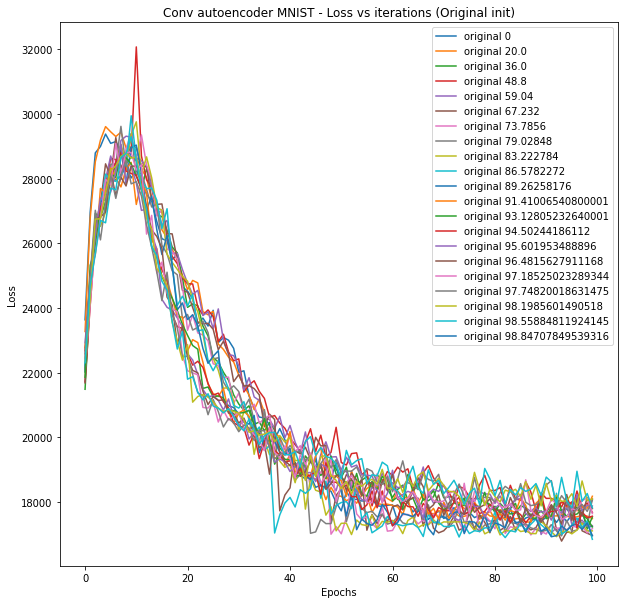

In [76]:
import re
import matplotlib.pyplot as plt
import ast
import numpy as np

plt.figure(figsize = (10, 10))

orig_losses = {}
orig_KL = {}
orig_KL[0] = unpruned_KL
orig_losses[0] = unpruned_losses
pruning_percs = []

with open("mnist_iter/train.log") as f:
    lines = f.read()
    losses = re.findall("Loss: (.*) BCE:", lines)
    KL = re.findall(" KL: (.*)", lines)
    KL = [float(j) for j in KL]
    losses = [-float(j) for j in losses]
    pruning_percs = [0] + ast.literal_eval(re.findall("Weight fractions: (.*)", lines)[0])
    
    for i in range(len(pruning_percs)):
        start = i*100
        end = i*100+100
        orig_losses[pruning_percs[i]] = losses[start:end]
        orig_KL[pruning_percs[i]] = KL[start:end]
        plt.plot(losses[start:end], label = "original " + str(pruning_percs[i]))

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Conv autoencoder MNIST - Loss vs iterations (Original init)')
plt.legend()
plt.show()

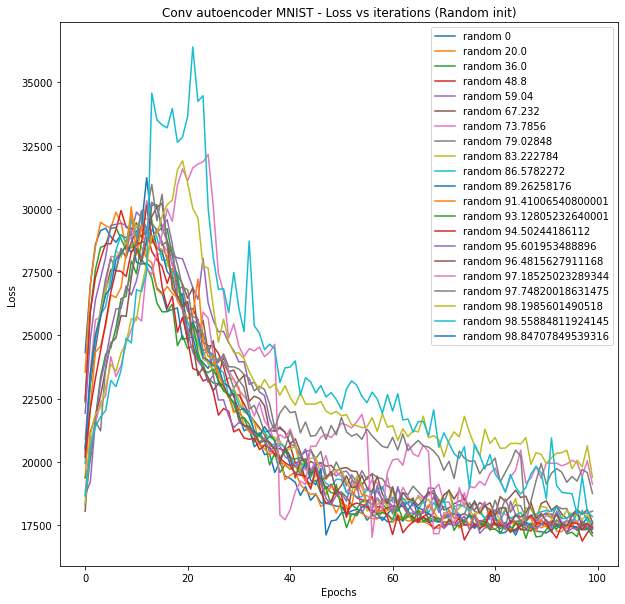

In [77]:
import re
import matplotlib.pyplot as plt
import ast

plt.figure(figsize = (10, 10))

rand_losses = {}
rand_KL = {}
rand_KL[0] = unpruned_KL
rand_losses[0] = unpruned_losses
pruning_percs = []

with open("mnist_random_iter/train.log") as f:
    lines = f.read()
    losses = re.findall("Loss: (.*) BCE:", lines)
    losses = [-float(j) for j in losses]
    KL = re.findall(" KL: (.*)", lines)
    KL = [float(j) for j in KL]
    pruning_percs = [0] + ast.literal_eval(re.findall("Weight fractions: (.*)", lines)[0])
    
    for i in range(len(pruning_percs)):
        start = i*100
        end = i*100+100
        rand_losses[pruning_percs[i]] = losses[start:end]
        rand_KL[pruning_percs[i]] = KL[start:end]
        plt.plot(losses[start:end], label = "random " + str(pruning_percs[i]))
        
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Conv autoencoder MNIST - Loss vs iterations (Random init)')
plt.legend()
plt.show()

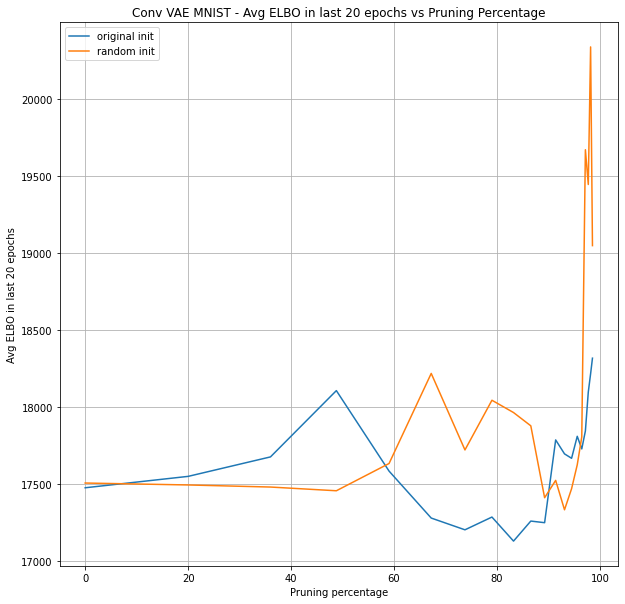

In [78]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (10, 10))

avg_orig = []
avg_rand = []

for i in orig_losses:
    avg_orig.append(np.mean(orig_losses[i][-20:]))
    avg_rand.append(np.mean(rand_losses[i][-20:]))
    
plt.plot(list(orig_losses.keys()), avg_orig, label = "original init")
plt.plot(list(orig_losses.keys()), avg_rand, label = "random init")
    
plt.xlabel('Pruning percentage')
plt.ylabel('Avg ELBO in last 20 epochs')
plt.title('Conv VAE MNIST - Avg ELBO in last 20 epochs vs Pruning Percentage')
plt.legend()
plt.grid()
plt.show()

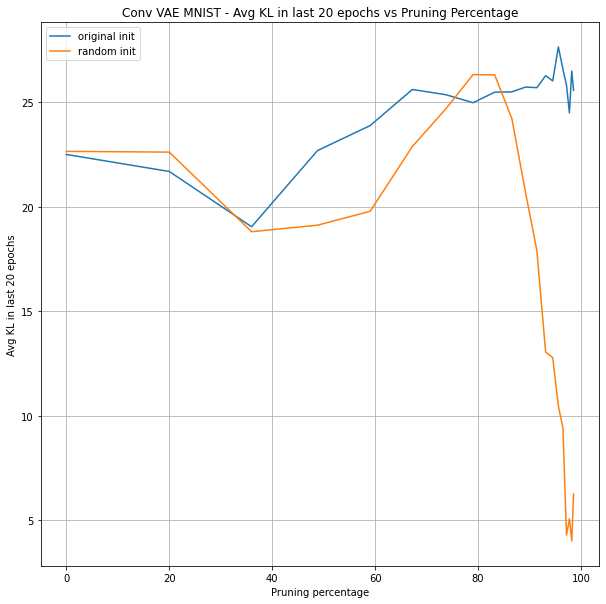

In [79]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (10, 10))

avg_orig = []
avg_rand = []

for i in orig_KL:
    avg_orig.append(np.mean(orig_KL[i][-20:]))
    avg_rand.append(np.mean(rand_KL[i][-20:]))
    
plt.plot(list(orig_KL.keys()), avg_orig, label = "original init")
plt.plot(list(orig_KL.keys()), avg_rand, label = "random init")
    
plt.xlabel('Pruning percentage')
plt.ylabel('Avg KL in last 20 epochs')
plt.title('Conv VAE MNIST - Avg KL in last 20 epochs vs Pruning Percentage')
plt.legend()
plt.grid()
plt.show()

In [80]:
for i in orig_losses:
    print(i)

0
20.0
36.0
48.8
59.04
67.232
73.7856
79.02848
83.222784
86.5782272
89.26258176
91.41006540800001
93.12805232640001
94.50244186112
95.601953488896
96.4815627911168
97.18525023289344
97.74820018631475
98.1985601490518
98.55884811924145
98.84707849539316
